# Uma implementação do método de Taylor
## 1. Dedução das fórmulas dos coeficientes usando sympy

In [1]:
#NumPy é a principal biblioteca para cálculos científicos de Python. Ela disponibiliza o objeto multidimensional 
#arranjo, objetos derivados, e um conjuntos de rotinas para operações rápidas sobre arranjos.
import numpy as np
#SymPy é uma biblioteca para cálculos simbólicos como integração exata, derivação, 
#resolução de equações, expansão em série de Taylor, etc
import sympy as sp 
#pandas é uma ferramenta de código aberto construída sobre Python para análise e manipulação de dados 
import pandas as pd
#Para mostrar tabelas mais bonitas
from IPython.display import HTML
#Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#variáveis e funções simbólicas. configuração de sympy
x, y = sp.symbols('x y')
f,phi    = sp.symbols('f phi', cls=sp.Function)
sp.init_printing(use_unicode=True)

In [3]:
#coeficiente de h
expr_f = f(x, y)

In [32]:
#coeficiente de h^2
#composta f(x,phi(x))
expr_f_phi = expr_f.subs(y, phi(x))
#derivar f(phi(x)) em relação a x
expr_der_f_phi = sp.diff(expr_f_phi,x)
#substituir f(x,phi(x)) no lugar de phi'(x)
expr_subs_phi_p_f = (expr_der_f_phi).subs(sp.diff(phi(x),x),expr_f_phi)
#substituir y no lugar de phi(x) 
expr_subs_phi_y = (expr_subs_phi_p_f).subs(phi(x),y)
expr_subs_phi_y/2

        ∂             ⎛ ∂           ⎞│    
f(x, y)⋅──(f(x, y))   ⎜───(f(ξ₁, y))⎟│    
        ∂y            ⎝∂ξ₁          ⎠│ξ₁=x
─────────────────── + ────────────────────
         2                     2          

In [30]:
#coeficiente de h^3
#composta coeficiente anterior com phi(x)
expr_f_phi1 = expr_subs_phi_y.subs(y, phi(x))
#derivar coeficiente anterior em relação a x
expr_der_f_phi1 = sp.diff(expr_subs_phi_p_f,x)
#substituir f(x,phi(x)) no lugar de phi'(x)
expr_subs_phi_p_f1 = (expr_der_f_phi1).subs(sp.diff(phi(x),x),expr_f_phi)
#substituir y no lugar de phi(x) 
expr_subs_phi_y1 = (expr_subs_phi_p_f1).subs(phi(x),y)
expr_subs_phi_y1

                                                           ⎛          2       
⎛        ∂             ⎛ ∂           ⎞│    ⎞ ∂             ⎜         ∂        
⎜f(x, y)⋅──(f(x, y)) + ⎜───(f(ξ₁, y))⎟│    ⎟⋅──(f(x, y)) + ⎜f(x, y)⋅───(f(x, y
⎝        ∂y            ⎝∂ξ₁          ⎠│ξ₁=x⎠ ∂y            ⎜          2       
                                                           ⎝        ∂y        

     ⎛   2          ⎞│   ⎞                   ⎛   2            ⎞│       ⎛  2   
     ⎜  ∂           ⎟│   ⎟                   ⎜  ∂             ⎟│       ⎜ ∂    
)) + ⎜─────(f(x, ξ))⎟│   ⎟⋅f(x, y) + f(x, y)⋅⎜──────(f(ξ₁, y))⎟│     + ⎜────(f
     ⎝∂x ∂ξ         ⎠│ξ=y⎟                   ⎝∂y ∂ξ₁          ⎠│ξ₁=x   ⎜   2  
                         ⎠                                             ⎝∂ξ₁   

        ⎞│    
        ⎟│    
(ξ₁, y))⎟│    
        ⎟│    
        ⎠│ξ₁=x

## 2. Implementação do método

In [6]:
#definição da função f no membro direito da equação (simbólica)
f1 = (y+x**2-2)/(x+1)
# solução exata da equação
def phi_1(a):
    return a**2+2*a+2-2*(a+1)*np.log(a+1) 
# Condições iniciais
x0 = 0
y0 = 2
#Extremo direito do intervalo
X = 6 

## 3. Cálculo dos coeficientes para implementar o método

In [7]:
#Ordem do método de Taylor
M = 4

In [8]:
#Phi do Método de Taylor de ordem M
def coeftes_Taylor(M):
    """
    Calcula as funções nos coeficientes da função Phi do método de Taylor de ordem N.
    
    Parâmetros
    ----------
    f1 : function simbolica (sympy)
        Função para avaliar o termo direito da EDO.
    N : integer
        Ordem do método 
    
    Retorna
    -------
    coef : lista
           lista das funções: coeficientes do método de Taylor
    """
    coef = []
    fat = 1
    #coeficiente de h
    coef.append(sp.lambdify([x, y],f1))
    #composta f(x,phi(x))
    f_phi = f1.subs(y, phi(x))
    for j in range(2,M+1):
        #coeficiente de h^j
        #atualizar fatorial
        fat = fat *j
        #derivar coeficiente anterior com y substituido por phi(x), em relação a x
        der_f_phi = sp.diff(f_phi,x)
        #substituir f(x,phi(x)) no lugar de phi'(x)
        subs_phi_p = (der_f_phi).subs(sp.diff(phi(x),x),f1)
        #substituir y no lugar de phi(x) 
        subs_phi_por_y = (subs_phi_p).subs(phi(x),y)
        #transformar em função de Python
        coef.append(sp.lambdify([x, y],subs_phi_por_y/fat))
        #preparar para o próximo cálculo: substituir phi(x) no lugar de y 
        f_phi = subs_phi_por_y.subs(y,phi(x))
    return coef

In [9]:
#Funções f_j
coeftes = coeftes_Taylor(M)

In [10]:
#Passo do Método de Taylor de ordem M = len(coeftes)
def passo_Taylor(x, y, h_vetor, coeftes):
    """
    Executa uma iteração do método de Taylor de ordem M.
    
    Parâmetros
    ----------
    x : float
        Ponto anterior da malha
    y : float.
        Aproximação da solução no ponto anterior.
    f : function
        Função para avaliar o termo direito da EDO.
    h_vetor : numpyarray [h,h^2,...,h^M]
        Vetor das potências do passo  
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto atual.
    """
    vet_coeftes = np.array([coeftes[j](x,y) for j in range(M)])
    y_novo = y + sum(vet_coeftes*h_vetor)
    return y_novo 

In [11]:
# Consideramos 6 tamanhos de passo possíveis
lista_h = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
# Lista com as malhas
lista_x = []
# Lista com as soluções aproximadas para cada malha
lista_y = []
# Lista com os erros absolutos de cada malha
erros_abs = []
#Aplicamos o método de Euler
for h in lista_h:
    N = int((X-x0) / h)   # quantidade de passos
    xv = np.linspace(x0, X, num=N+1)  # malha 
    yv = np.empty_like(xv) #inicializar z
    xv[0] = x0 #x inicial
    yv[0] = y0 #y inicial
    #vetor com os passos h^j
    h_vetor = np.array([h**(j+1) for j in range(M)])
    # N iterações do método de Taylor.
    for n in range(N):
        yv[n + 1] = passo_Taylor(xv[n],yv[n],h_vetor, coeftes) #iteração do método de Euler
    lista_x.append(xv) #armazenar malha 
    lista_y.append(yv)  # armazenar arranjo com as aproximações usando essa malha
    erros_abs. append(phi_1(xv)-yv) # armazenar erro global  

In [12]:
#Mostrar apenas 4 dígitos depois da vírgula
pd.set_option('precision',4)
#Pontos da malha cujos erros serão mostrados
x_ex = np.linspace(1, 6, 6)
#d: Dicionário com os dados que serão tabelados
d = {'x': x_ex} # Valores de x cujos erros serão exibidos
for j in range(len(lista_h)):# em cada iteração do loop, calculamos 3 colunas
    d['h'+str(j+1)] = [lista_h[j],'','','','',''] # Coluna com o h usado
    err_abs = erros_abs[j][int(1/lista_h[j]):int((X-x0)/lista_h[j] + 1):int(1/lista_h[j])]
    d['Erro Abs. '+ str(j+1)] = err_abs # coluna do erro absoluto
    d['Erro Rel. '+ str(j+1)] = err_abs/phi_1(lista_x[j][int(1/lista_h[j]):int((X-x0)/lista_h[j] + 1)\
                                                         :int(1/lista_h[j])])# coluna do erro relativo
df = pd.DataFrame(data=d) # Formação da tabela
df.style.set_properties(**{'text-align': 'left'}) #Alinhamento à esquerda nas colunas
HTML(df.to_html(index=False)) # Tirar a coluna de índices

x,h1,Erro Abs. 1,Erro Rel. 1,h2,Erro Abs. 2,Erro Rel. 2,h3,Erro Abs. 3,Erro Rel. 3,h4,Erro Abs. 4,Erro Rel. 4,h5,Erro Abs. 5,Erro Rel. 5,h6,Erro Abs. 6,Erro Rel. 6
1.0,0.2,8.4323e-05,3.7857e-05,0.1,4.9965e-06,2.2432e-06,0.05,3.0286e-07,1.3597e-07,0.01,4.7197e-10,2.1189e-10,0.005,2.9396e-11,1.3197e-11,0.001,3.6415e-14,1.6349e-14
2.0,,1.3292e-04,3.8998e-05,,7.8842e-06,2.3132e-06,,4.7822e-07,1.4031e-07,,7.4570e-10,2.1879e-10,,4.6449e-11,1.3628e-11,,5.2847e-14,1.5505e-14
3.0,,1.7864e-04,3.0228e-05,,1.0599e-05,1.7935e-06,,6.4296e-07,1.0880e-07,,1.0027e-09,1.6968e-10,,6.2458e-11,1.0569e-11,,7.0166e-14,1.1873e-14
4.0,,2.2378e-04,2.2591e-05,,1.3278e-05,1.3404e-06,,8.0552e-07,8.1320e-08,,1.2563e-09,1.2683e-10,,7.8254e-11,7.8999e-12,,9.2371e-14,9.3251e-15
5.0,,2.6874e-04,1.7339e-05,,1.5946e-05,1.0288e-06,,9.6741e-07,6.2418e-08,,1.5088e-09,9.7349e-11,,9.3971e-11,6.0631e-12,,1.0303e-13,6.6475e-15
6.0,,3.1363e-04,1.3782e-05,,1.8610e-05,8.1775e-07,,1.1290e-06,4.9612e-08,,1.7609e-09,7.7377e-11,,1.0970e-10,4.8206e-12,,1.1724e-13,5.1517e-15


Na tabela observamos que, de fato, os erros diminuem com a diminuição do valor de ℎ

. Também podemos observar que os erros são maiores que os do exemplo 1.

Podemos representar os resultados também usando diferentes tipos de gráficos.

A seguir plotamos a solução exata junto com algumas soluções aproximadas que são interpoladas linearmente pelo Python.

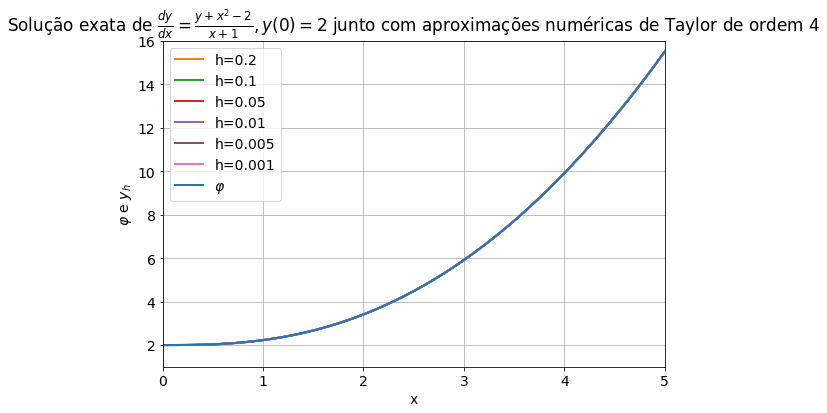

In [28]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem da solução exata junto com as três aproximações obtidas.
plt.figure(figsize=(9.0, 6.0))  # Fixar o tamanho da figura
# título
plt.title(r"Solução exata de $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$ junto " +  
"com aproximações numéricas de Taylor de ordem "+str(M))  
plt.xlabel('x')
plt.ylabel(r'$\varphi$ e $y_h$')
plt.xlim(0, 5)  # especifica limites no eixo x
plt.ylim(1, 16)  # especifica limites no eixo y
plt.grid()  # set a background grid to improve readability
for j in range(len(lista_h)):
    plt.plot(lista_x[j], lista_y[j], label='h='+str(lista_h[j]), color = 'C'+str(j+1), linestyle='-', linewidth=2)
x1 = np.linspace(0, 5, 50)
plt.plot(x1, phi_1(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2)
plt.legend();
#plt.savefig(’tmp3.pdf’)
#plt.show()

Agora a visualização melhorou mas como há uma grande diferença entre o maior e o menor erro, não é possível ter uma boa visualização de todos eles. Podemos melhorar isso mudando a escala para a escala logarítmica.

No gráfico a seguir, usaremos a escala logarítmica no eixo y.

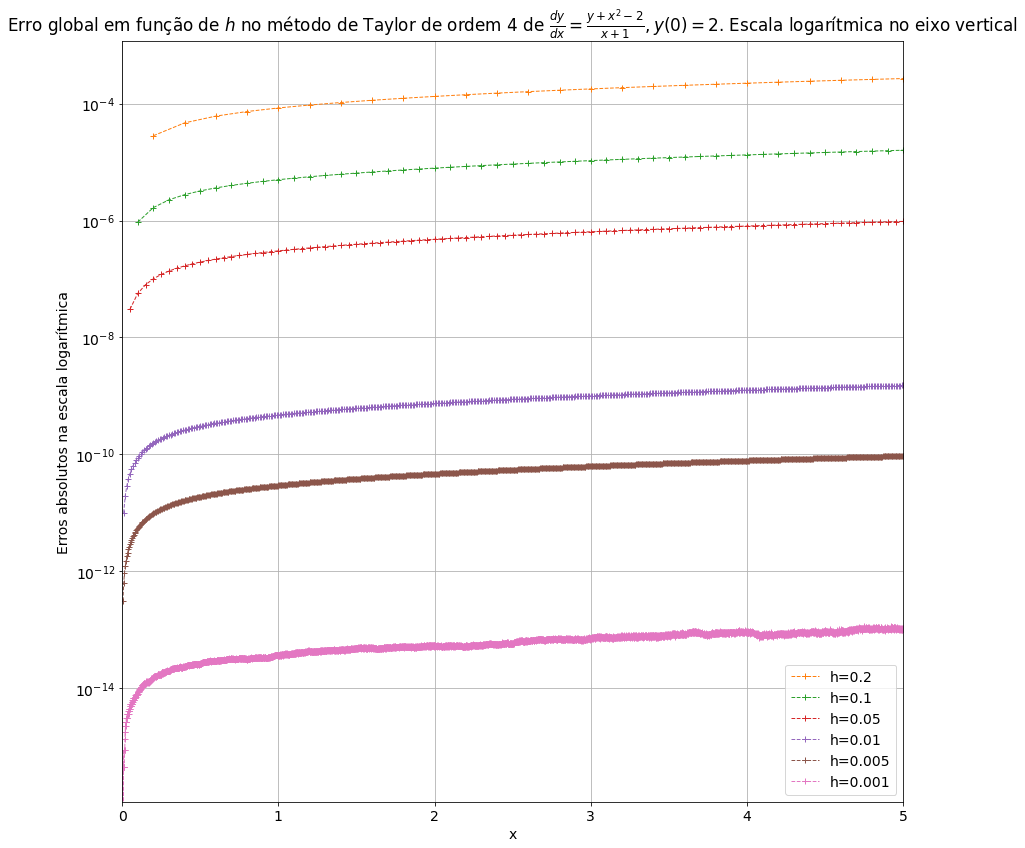

In [24]:
# Plotagem dos erros das aproximações obtidas na escala logarítmica.
plt.figure(figsize=(14.0, 14.0))  # Fixar o tamanho da figura
plt.title(r"Erro global em função de $h$ no método de Taylor de ordem " \
          + str(M) + r" aplicado a $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$." + \
          " Escala logarítmica no eixo vertical")  # título
plt.xlabel('x')
plt.ylabel('Erros absolutos na escala logarítmica')
plt.xlim(0, 5)  # especifica limites no eixo x
#plt.ylim(40.0, 160.0)  # especifica limites no eixo y
plt.grid()  # set a background grid to improve readabilityfor j in range(len(lista_h)):
for j in range(len(lista_h)):
    plt.plot(lista_x[j][1:-1], abs(erros_abs[j][1:-1]), \
             label='h='+str(lista_h[j]), color = 'C'+str(j+1), marker='+', linewidth=1, linestyle='--')    
plt.semilogy()
plt.legend();

Observe que algumas das curvas obtidas parecem ser uma translação da outra, da mesma constante. Por quê?

Pode ser provado que $$\varphi(x) - y_h(x) \approx c(x) h.$$

Portanto, para $x$ fixado, $\log |\varphi(x) - y_h(x)| \approx \log |c(x)| + \log h$ e se $h_1 = kh$, então 

$\log(|\varphi(x) - y_{h_1}(x)|) \approx \log|c(x)| + \log kh = \log k + (\log|c(x)| + \log h).$ 

Poderíamos usar a escala logarítmica no eixo $x$ também. No próximo gráfico representamos $E(h)$ como função de $h$ usando a escala logarítmica nos dois eixos.

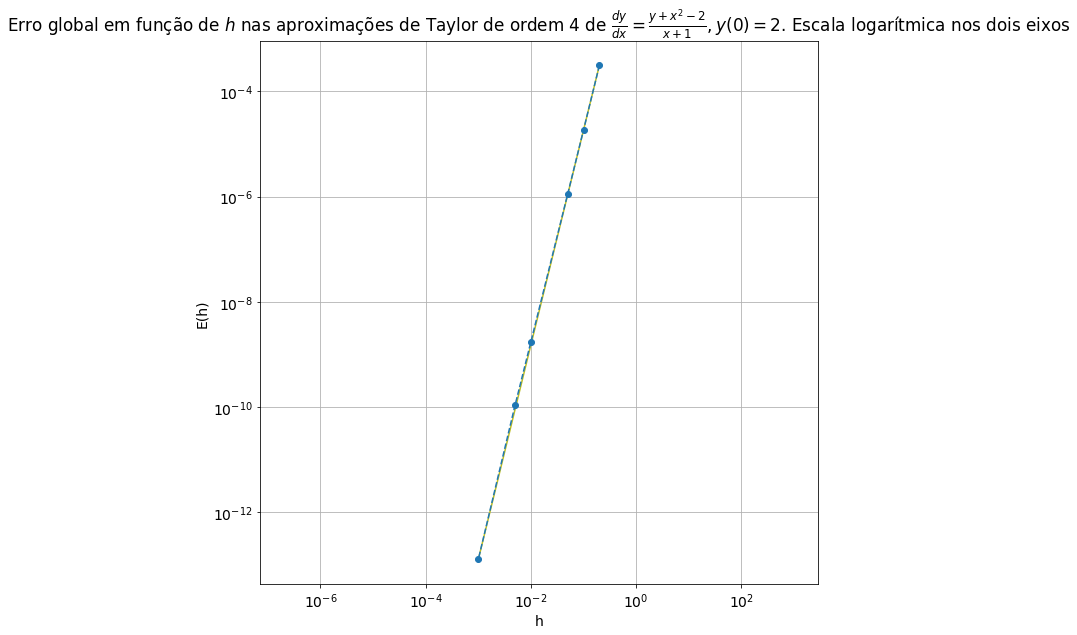

In [22]:
# Plotagem de E(h) como função de h na escala logarítmica nos dois eixos.
E = np.array([np.max(np.abs(erros_abs[j])) for j in range(len(lista_h))]) # Cálculo de E(h)
plt.figure(figsize=(10.0, 10.0))  # Fixar o tamanho da figura
plt.title(r"Erro global em função de $h$ no método de Taylor de ordem " \
          + str(M) + r" aplicado a $\frac{dy}{dx}= \frac{y+x^2-2}{x+1}, y(0) = 2$." + \
          " Escala logarítmica nos dois eixos")  # título
plt.xlabel('h')
plt.ylabel(r'E(h)')
#plt.xlim(0, 0.2)  # especifica limites no eixo x
#plt.ylim(40.0, 160.0)  # especifica limites no eixo y
plt.grid()  # set a background grid to improve readabilityfor j in range(len(lista_h)):
plt.loglog([lista_h[0], lista_h[5]], [E[0], E[5]], color='C8', linestyle='-')\
# plotar log-log 
plt.loglog(lista_h, E, color='C0', linestyle='--', marker='o')  # plotar log-log 
plt.axis('equal');  # make axes scale equally

In [16]:
#Coeficiente angular do segmento verde
print(r'Coeficiente angular do segmento verde:', (np.log(E[0])- np.log(E[5]))/(np.log(lista_h[0]) - np.log(lista_h[5])))

Coeficiente angular do segmento verde: 4.080587349852009
